1. Handling Data
The first thing we need to do is load our data file. 

In [ ]:
import csv
with open('iris.data.txt', 'r') as csvfile:
    lines = csv.reader(csvfile)
    for row in lines :
        print (', '.join(row))


1.1 Next we need to split the data into a training dataset and displaying it

In [ ]:
import csv
import random
import math
import operator

def loadDataset(filename, split, trainingSet=[] , testSet=[]):
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset)):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])
                

In [ ]:

trainingSet = []
testSet = []
loadDataset('iris.data.txt',0.66,trainingSet, testSet)
print ("Train: " + repr(len(trainingSet)))
print ("Test: " + repr(len(testSet)))

2. Similarity calaculus to make predictions using Euclidean distance measure
In order to make predictions we need to calculate the similarity between any two given data instances.
This is needed so that we can locate the k most similar data instances in the training dataset for a given 
member of the test dataset and in turn make a prediction.

Given that all four flower measurements are numeric and have the same units, we can directly use the 
Euclidean distance measure. 

Additionally, we want to control which fields to include in the distance calculation. Specifically, 
we only want to include the first 4 attributes. One approach is to limit the Euclidean distance to a 
fixed length, ignoring the final dimension.


In [ ]:

def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

testing the function with some sample data

In [ ]:

data1 = [2, 2, 2, 'a']
data2 = [4, 4, 4, 'b']
distance = euclideanDistance(data1, data2, 3)
print ("Distance: " + repr(distance))


3. Neighbors :finding k most similar instances
Now that we have a similarity measure, we can use it to collect the k most similar instances
for a given unseen instance.

This is a straight forward process of calculating the distance for all instances and selecting
a subset with the smallest distance values.

Below is the getNeighbors function that returns k most similar neighbors from the training set 
for a given test instance (using the already defined euclideanDistance function)

In [ ]:

def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key = operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

3.1 We can test  this function getNeighbors as follows:


In [ ]:

trainSet = [[2, 2, 2, 'a'], [4, 4, 4, 'b']]
testInstance = [5, 5, 5]
k = 1 # 1 neighbor
neighbors = getNeighbors(trainSet, testInstance, 1)
print ("Neighbors Are: ",)
print (neighbors)

In [ ]:

4. Response devise predicted response based on neighbors :list creation with all possible neighbors

Once we have located the most similar neighbors for a test instance, 
the next task is to devise a predicted response based on those neighbors.

We can do this by allowing each neighbor to vote for their class attribute, 
and take the majority vote as the prediction.

Below provides a function for getting the majority voted response from a number
of neighbors. It assumes the class is the last attribute for each neighbor.

In [ ]:

def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
              classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

4.1 We can test  this function and print out with some test neighbors, as follows:


In [ ]:
neighbors = [[1, 1, 1, 'a'], [2, 2, 2, 'a'], [3, 3, 3, 'b']]
response = getResponse(neighbors)
print ("Response Is: " + repr(response))

5. Accuracy classification (ratio of total correct predictions out of all predictions)
We have all of the pieces of the KNN algorithm in place. An important remaining concern 
is how to evaluate the accuracy of predictions.

An easy way to evaluate the accuracy of the model is to calculate a ratio of the total 
correct predictions out of all predictions made, called the classification accuracy.

Below is the getAccuracy function that sums the total correct predictions and returns
the accuracy as a percentage of correct classifications.

In [ ]:
    
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0
                

5.1 We can test this function out with our iris dataset, as follows:

In [ ]:

testSet = [[1, 1, 1, 'a'], [2, 2, 2, 'a'], [3, 3, 3, 'b']]
predictions = ['a', 'a', 'a']
accuracy = getAccuracy(testSet, predictions)
print ("Accuracy Is: " + repr(accuracy))


6. Main
  We now have all the elements of the algorithm 
  we can put them all in one main function


In [9]:
    
def main():
    trainingSet=[]
    testSet=[]
    split = 0.67
    loadDataset('iris.data.txt', split, trainingSet, testSet)
    print ('Train set: ' + repr(len(trainingSet)))
    print ('Test set: ' + repr(len(testSet)))   
    predictions=[]
    k = 3
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
    print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
    accuracy = getAccuracy(testSet, predictions)
    print ('Accuracy:',accuracy)

main()

Train set: 89
Test set: 61
> predicted='Iris-virginica', actual='Iris-virginica'
Accuracy: 98.36065573770492


7. Another distance metric

In this part we define another distance metric instead of euclidean distance


In [37]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

from datetime import datetime, timedelta,date
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as seabornInstance 
from sklearn.metrics import r2_score,mean_squared_error

#import project datafile

import csv
with open('iris.data.txt', 'r') as csvfile:
    lines = csv.reader(csvfile)
    for row in lines :
        print (','.join(row))



5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa
5.4,3.7,1.5,0.2,Iris-setosa
4.8,3.4,1.6,0.2,Iris-setosa
4.8,3.0,1.4,0.1,Iris-setosa
4.3,3.0,1.1,0.1,Iris-setosa
5.8,4.0,1.2,0.2,Iris-setosa
5.7,4.4,1.5,0.4,Iris-setosa
5.4,3.9,1.3,0.4,Iris-setosa
5.1,3.5,1.4,0.3,Iris-setosa
5.7,3.8,1.7,0.3,Iris-setosa
5.1,3.8,1.5,0.3,Iris-setosa
5.4,3.4,1.7,0.2,Iris-setosa
5.1,3.7,1.5,0.4,Iris-setosa
4.6,3.6,1.0,0.2,Iris-setosa
5.1,3.3,1.7,0.5,Iris-setosa
4.8,3.4,1.9,0.2,Iris-setosa
5.0,3.0,1.6,0.2,Iris-setosa
5.0,3.4,1.6,0.4,Iris-setosa
5.2,3.5,1.5,0.2,Iris-setosa
5.2,3.4,1.4,0.2,Iris-setosa
4.7,3.2,1.6,0.2,Iris-setosa
4.8,3.1,1.6,0.2,Iris-setosa
5.4,3.4,1.5,0.4,Iris-setosa
5.2,4.1,1.5,0.1,Iris-setosa
5.5,4.2,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa
5.0,3.2,1.2,0.2,Iris

In [38]:
type(df)

sklearn.utils.Bunch

In [39]:
# features names
print(df.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [40]:
# target classes 
print(df.target_names)

['setosa' 'versicolor' 'virginica']


In [41]:
print(df.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [42]:
# 4 fetures / 150 observations
print(df.data.shape)

(150, 4)


In [43]:
# iris data
df.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [44]:
# X feature matrix 
X = df.data

# y response vector 
y = df.target

print('X.shape',X.shape)
print('y.shape',y.shape)

X.shape (150, 4)
y.shape (150,)


In [46]:
# data splitting  80 for training / 20 for test 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [47]:
#shape of train and test objects

print('X_train.shape :',X_train.shape)
print('X_test.shape :', X_test.shape)

# shape of new y objects

print('y_train.shape :',(y_train.shape))
print('y_test.shape :',(y_test.shape))



X_train.shape : (120, 4)
X_test.shape : (30, 4)
y_train.shape : (120,)
y_test.shape : (30,)


In [48]:
from sklearn.neighbors import KNeighborsClassifier
#import metrics model for accuracy checking
from sklearn import metrics
#testing accuracy for k=1 to 25
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))
        
# accuracy running for K values [1,25]
scores

{1: 0.9333333333333333,
 2: 0.9333333333333333,
 3: 0.9666666666666667,
 4: 0.9666666666666667,
 5: 0.9666666666666667,
 6: 0.9666666666666667,
 7: 0.9666666666666667,
 8: 0.9666666666666667,
 9: 0.9666666666666667,
 10: 0.9666666666666667,
 11: 0.9666666666666667,
 12: 0.9666666666666667,
 13: 0.9666666666666667,
 14: 0.9666666666666667,
 15: 0.9666666666666667,
 16: 0.9666666666666667,
 17: 0.9666666666666667,
 18: 0.9666666666666667,
 19: 0.9666666666666667,
 20: 0.9333333333333333,
 21: 0.9666666666666667,
 22: 0.9333333333333333,
 23: 0.9666666666666667,
 24: 0.9666666666666667,
 25: 0.9666666666666667}

Text(0, 0.5, 'Testing Accuracy')

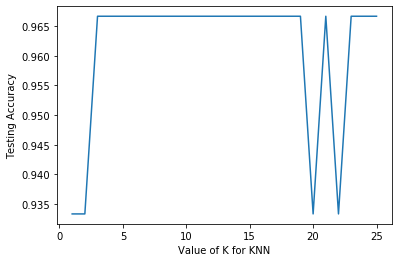

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt

#relationship between K & testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

Text(0, 0.5, 'Mean Error')

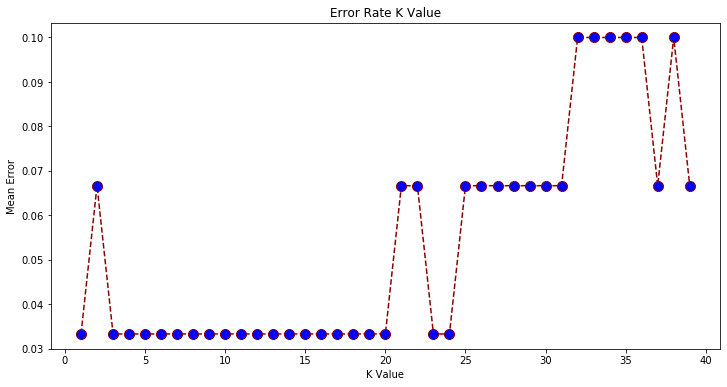

In [50]:
#error values plotting vs k values 
plt.figure(figsize=(12,6))
plt.plot(range(1, 40), error, color='darkred', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')